In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns


In [189]:
#Hämtar kommun och respektive kluster

dataRegionLabeled = pd.read_csv('RegionClusteringLabeled.csv', usecols=['0', '1'])
dataRegionLabeled = dataRegionLabeled.rename(columns=({'0':'Clusterlabel'}))  #Anger nytt logisk namn på kolumnen
dataRegionLabeled = dataRegionLabeled.rename(columns=({'1':'Region'}))  #Anger nytt logisk namn på kolumnen
print(dataRegionLabeled.head())

   Clusterlabel               Region
0             8  0114 Upplands Väsby
1             0      0115 Vallentuna
2             8       0117 Österåker
3             8          0120 Värmdö
4             3        0123 Järfälla


In [190]:
# Filtrera ut de kommuner som tillhör kluster 0
filtered_dataRegionLabeled = dataRegionLabeled[dataRegionLabeled['Clusterlabel'] == 0].loc[0:, ['Region']]
print(filtered_dataRegionLabeled.head())
print(filtered_dataRegionLabeled.shape)

dataByRegion = filtered_dataRegionLabeled
print(dataByRegion.head())
print(dataByRegion.shape)

             Region
1   0115 Vallentuna
5        0125 Ekerö
10      0138 Tyresö
13        0160 Täby
15  0163 Sollentuna
(60, 1)
             Region
1   0115 Vallentuna
5        0125 Ekerö
10      0138 Tyresö
13        0160 Täby
15  0163 Sollentuna
(60, 1)


In [191]:
#Hämtar information från SCBs csv-filer
# joinar på information från år 2019
# döper om kolumn 

ReplaceComma = lambda x: (x.replace(',','.'))

#dataByRegion = pd.read_csv('Folkmängd.csv', delimiter = ';', usecols=['Region','2019'])
#dataByRegion = dataByRegion.rename(columns=({'2019':'Folkmängd'}))


nyData = pd.read_csv('Folkmängd.csv', delimiter = ';', usecols=['Region','2019'])
nyDataKolumn = nyData.rename(columns=({'2019':'Folkmängd'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

nyData = pd.read_csv('Flyttningsöverskott.csv', delimiter = ';', usecols=['Region','2019'])
nyDataKolumn = nyData.rename(columns=({'2019':'Flyttningsöverskott'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

nyData = pd.read_csv('Invandringsöverskott.csv', delimiter = ';', usecols=['Region','2019'])
nyDataKolumn = nyData.rename(columns=({'2019':'Invandringsöverskott'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

nyData = pd.read_csv('Medelålder.csv', delimiter = ';', usecols=['Region','2019'], converters={'2019': ReplaceComma})
nyDataKolumn = nyData.rename(columns=({'2019':'Medelålder'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

nyData = pd.read_csv('Invånare60plus.csv', delimiter = ';', usecols=['Region','2019'])
nyDataKolumn = nyData.rename(columns=({'2019':'Invånare60plus'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

nyData = pd.read_csv('Folkmängd.csv', delimiter = ';', usecols=['Region','2022'])
nyDataKolumn = nyData.rename(columns=({'2022':'Folkmängd_3ÅrSenare'}))
dataByRegion = dataByRegion.merge(nyDataKolumn, left_on='Region', right_on='Region')

print(dataByRegion.head())

            Region  Folkmängd  Flyttningsöverskott  Invandringsöverskott  \
0  0115 Vallentuna      34090                  531                   160   
1       0125 Ekerö      28690                  258                   231   
2      0138 Tyresö      48333                  172                   197   
3        0160 Täby      71874                  342                   311   
4  0163 Sollentuna      73857                 1002                   769   

  Medelålder  Invånare60plus  Folkmängd_3ÅrSenare  
0       39.0            6972                34851  
1       39.8            6390                29123  
2       39.8           10318                49214  
3       40.9           17060                75137  
4       39.1           15152                76237  


In [192]:
# Ladda in data
# Ta bort kolumn med Regionkod (vill inte visa i correlation matrix)

#dataByRegion = dataByRegion.drop(columns = ["Regionkod"]) #Ta bort kolumn
nyData = dataByRegion.dropna() # Tar bort rader med missing values

print(nyData.head())

print(nyData.shape)


            Region  Folkmängd  Flyttningsöverskott  Invandringsöverskott  \
0  0115 Vallentuna      34090                  531                   160   
1       0125 Ekerö      28690                  258                   231   
2      0138 Tyresö      48333                  172                   197   
3        0160 Täby      71874                  342                   311   
4  0163 Sollentuna      73857                 1002                   769   

  Medelålder  Invånare60plus  Folkmängd_3ÅrSenare  
0       39.0            6972                34851  
1       39.8            6390                29123  
2       39.8           10318                49214  
3       40.9           17060                75137  
4       39.1           15152                76237  
(60, 7)


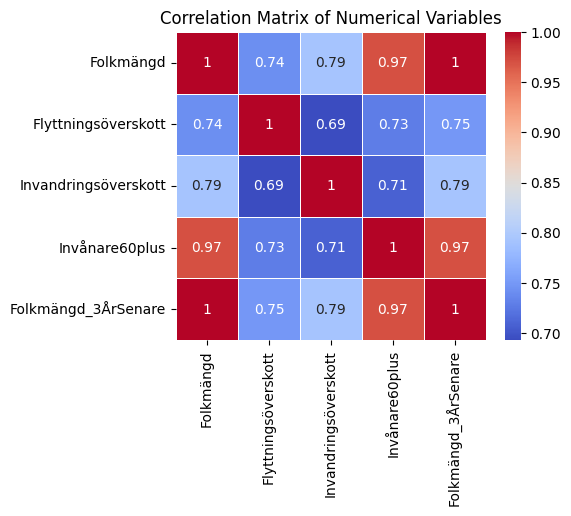

In [193]:
# Heatmap of correlation matrix
plt.figure(figsize=(5, 4))
correlation_matrix = nyData.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [194]:
# Välj features och target

X = nyData[['Folkmängd','Flyttningsöverskott','Invandringsöverskott', 'Medelålder']]
y = nyData['Folkmängd_3ÅrSenare']

# Dela upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapa en linjär regressionsmodell
model = LinearRegression()

# Träna modellen
model.fit(X_train, y_train)

LinearRegression()

In [195]:
# Gör prediktioner på testdata
y_pred = model.predict(X_test)

# Beräkna mean squared error och R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R2 score: {r2}")

#print(X_test)
#print(y_pred)

Mean squared error: 322824.5696168077
R2 score: 0.9981365796255381


In [196]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


    Actual     Predicted
0    34851  35614.617025
5    48432  49153.392017
36   28103  27924.491348
45   39852  40975.043326
13   28471  28858.321584
54   57463  57888.541275
33   16341  15961.508968
48   43536  43799.147261
12   21903  22303.817771
57   22981  23335.078489
46   27870  27506.989885
50   57282  57999.718373


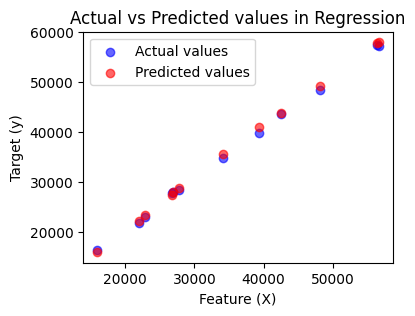

In [197]:
# Create a scatter plot for Actual vs Predicted values
plt.figure(figsize=(4,3))

# Plot the actual values
plt.scatter(X_test['Folkmängd'].astype('int64'), y_test, color='blue', label='Actual values', alpha=0.6)

# Plot the predicted values
plt.scatter(X_test['Folkmängd'].astype('int64'), y_pred, color='red', label='Predicted values', alpha=0.6) 

# Adding labels and title
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Actual vs Predicted values in Regression')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [198]:
# Exempel: Förutsäg antal medborgae för en kommun
#[ 'Folkmängd','Flyttningsöverskott','Invandringsöverskott', 'Medelålder']

#Vallentuna 34090,531, 160,  Invånare 2022 34851  (estimerat tidigare 35035.48) 
nyaVärdenRegion = [[34090,531, 160, 39]]   
beräknadFolkmängd = model.predict(nyaVärdenRegion)
print(f"Förväntat antalet medborgare 2022 för Vallentuna: {beräknadFolkmängd[0]:.2f} ")

#Sollentuna 73857, 1002, 769,   Invånare 2022 76237  (estimerat tidigare 75508) 
nyaVärdenRegion = [[73857, 1002, 769, 39.1]]  
beräknadFolkmängd = model.predict(nyaVärdenRegion)
print(f"Förväntat antalet medborgare 2022 för Sollentuna:: {beräknadFolkmängd[0]:.2f} ")

Förväntat antalet medborgare 2022 för Vallentuna: 35614.62 
Förväntat antalet medborgare 2022 för Sollentuna:: 76289.82 


c:\Users\clajn\Documents\Python_Kurs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\clajn\Documents\Python_Kurs\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
